<h1>Multivariate Linear Regression and Gradient Descent Implementation </h1>

Hi, there I am Saumya and in this notebook we I have implemented Multiple Variable Linear Regression and Gradient Descent from scratch and have given explaination of every step and line . <br>

<b>I hope you have a great time going through it !! ✔️</b>

In [26]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 

In [27]:
data= pd.read_csv('multLinRData.txt', header=None )
data.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


Here we used pandas to read our text file and used the 'head' function to see the first 5 entries of our data .

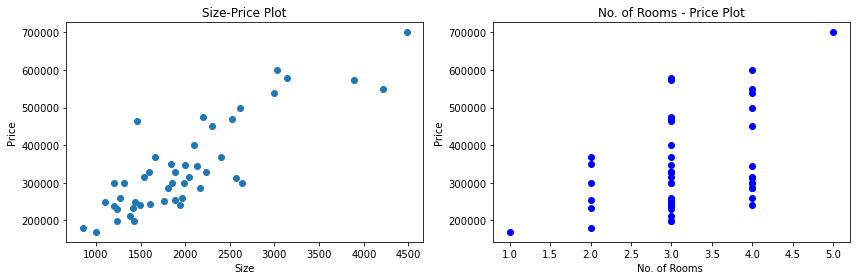

In [28]:
fig,axes= plt.subplots(figsize=(12,4),nrows=1, ncols=2 )
axes[0].scatter(data[0],data[2])
axes[0].set_xlabel("Size")
axes[0].set_ylabel("Price")
axes[0].set_title("Size-Price Plot")

axes[1].scatter(data[1],data[2],color='b')
axes[1].set_xlabel("No. of Rooms ")
axes[1].set_ylabel("Price")
axes[1].set_title("No. of Rooms - Price Plot")

plt.tight_layout()

Line 1: Here we use the 'subplots' function that would store multiple graphs in sort of an array i.e here 
        axes .So, you can see we have set the no. of rows=1 and no. of columns =2 i.e like setting a 2D array of 1x2 
        dimension and as you can see we have two plot in each columns of the only row . 
        Thus, the first plot & second plot are referred to as axes[0] and axes[1] resplectively .<br>
        
Line 2&7: This sees the data and plots the blue dots that you see in a scattering format as the name suggests .<br>

Line 3,4 & 8,9: Just label the graph.<br>

Line 5 & 10 : Adds the title .<br>

Line 12 : This fits the multiple graphs in the figure area.<br>

This StackOverflow answer may help : [Link](https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python)

        

In [29]:
def CostFunction(X,y,theta):
    m= len(y)
    J= 1/(2*m)*np.sum((X.dot(theta)-y)**2)        
    return J

<b>Cost Function :</b>
<br>

This is the function that takes in the input array(X) and output array(y) and parameter(theta) and then computes the Cost Function Formula that we had learnt in my [ML WEEK 1 BLOG](https://www.thecsengineer.com/2020/12/learning-machine-learning-course-week-1-andrewng.html).
![](https://render.githubusercontent.com/render/math?math=J%28%5CTheta%29%20%3D%20%5Cfrac%7B1%7D%7B2m%7D%20%28X%5CTheta%20-%20%5Coverrightarrow%7By%7D%29%5ET%20%28X%5CTheta%20-%20%5Coverrightarrow%7By%7D%29&mode=inline)

In [30]:

def GradientDescent(X, y, theta, learningRate , iterations):
    m= len(y)
    J_list =[]
    for i in range(iterations):
        theta = theta - (learningRate*(1/m)*(X.transpose().dot(X.dot(theta)-y)))
        J_list.append(CostFunction(X,y,theta))
    return theta,J_list    

<b>Gradient Descent on Linear Regression Function :</b>
<br>

Here we implement the formula of Gradient Descent that I had explained in the [BLOG]((https://www.thecsengineer.com/2020/12/learning-machine-learning-course-week-1-andrewng.html)) so the funtions takes X, y , theta , Learning rate and the number of iterations as the parameter .<br>
Inside we maintain a list of all the cost functions according to the varying theta in every iterations for visualising the descent later . 

In [31]:
def FeatureNormalization(X):
    mean = np.mean(X,axis=0)
    stdDev= np.std(X,axis=0)
    X_Normalized= (X-mean)/stdDev
    return X_Normalized

<b>Fearture Normalization Function :</b>
<br>

This function normalizes or minimizes our input data to a small range that would make Gradient descent faster .<br>

We do that by updating every value of a feature by substracting the mean of all the values of a feature from each of the value and dividing the answer by the standard deviation (max value - min value of the particular feature)
![hi](https://render.githubusercontent.com/render/math?math=x_i%20%3D%20%5Cfrac%7Bx_i%20-%20%5Cmu_i%7D%7B%5Csigma_i%7D&mode=inline)

In [32]:
data_arr= data.values
m=len(data_arr[:,-1])
X = data_arr[:,0:2].reshape(m,2)
y= data_arr[:,-1].reshape(m,1)
Norm_X= FeatureNormalization(X)
Norm_X= np.append(np.ones((m,1)),Norm_X,axis=1)
theta= np.zeros((3,1))

CostFunction(Norm_X,y, theta)

65591548106.45744

Line 1 : We extract the data into a dataframe , think it just as a table which hold a copy of our data .<br>

Line 2 : We get the number of training examples i,e the no. of rows .<br>

Line 3 : Here we store the inputs in a separate array i.e X which is of mx2 dimension.<br>

Line 4 : Here we store the outputs in a separate array i.e y which is of mx1 dimension.<br>

Line 5 : Here we call the Feature Normalization function i.e normalizes the input data.<br>

Line 6 : Here we add an additional row of 1s in the front row and the X matrix becomes mx3 dimension.<br>

Line 7 : Here we create the theta array which is just a 3x1 matrix of zeroes.

Line 8 : Here we call the function that gives us the cost function .

In [33]:
opt_theta , J_List= GradientDescent(Norm_X,y,theta,0.1,400)
print("h(x) = "+str(round(opt_theta[0,0],2))+" + "+str(round(opt_theta[1,0],2))+"x1 + "+str(round(opt_theta[2,0],2))+"x2 " )

h(x) = 340412.66 + 109447.8x1 + -6578.35x2 


Line 1 : Here we just call the functiona with th appropriate values like learning rate = 0.1 and number of iterations = 400          we get back the global minimum theta (opt_theta) and the list of cost functions .<br>

Line 2 : Here we use the obtaines optimal theta and display the <b>Multivariate Hypothesis Function<b> .


Text(0.5, 1.0, 'Cost function using Gradient Descent')

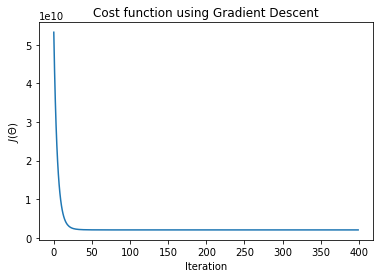

In [34]:
plt.plot(J_List)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

   <b>Cost Function vs Iteration Plot<b>

In [35]:
def Predict(x, theta ):
    prediction = theta.transpose().dot(x)
    return prediction[0]

<b>Prediction Function</b>
<br>
    
This functions gives the prediction according to the formula :
![](https://render.githubusercontent.com/render/math?math=h_%5CTheta%28x%29%20%3D%20%5CTheta%5ETx&mode=inline)

In [36]:

x_sample = FeatureNormalization(np.array([1650,3])) 
x_sample=np.append(np.ones(1),x_sample)
predict3=Predict(x_sample,opt_theta)
print("We predict that for the size 1650 and the no. of rooms 3 there will be a profit of "+" $"+str(round(predict3,0)))

We predict that for the size 1650 and the no. of rooms 3 there will be a profit of  $456439.0


<h3>Thank You , I hope you had a good time learning and if found it helpful you can Fork 🍴, Star 🌟 or Watch 👀 the 
    Repository🧡<h3>